In [37]:
import numpy as np
import os
import zdm
import scipy
from zdm import analyze_cube as ac
from IPython import embed
import matplotlib.pyplot as plt

real_data = False

cube = "../CRACO/Cubes/craco_full_cube.npz"
if real_data:
  cube = "../Real/Cubes/craco_real_cube.npz"

data = np.load(cube)

In [38]:
ivalues, lls, wlls = ac.get_bayesian_data(data['ll'])

pH0_idx = np.where(data["params"] == "H0")[0][0]
pH0 = lls[pH0_idx]
H0s = data["H0"]

plmean_idx = np.where(data["params"] == "lmean")[0][0]
plmean = lls[plmean_idx]
lmeans = data["lmean"]

plsigma_idx = np.where(data["params"] == "lsigma")[0][0]
plsigma = lls[plsigma_idx]
lsigmas = data["lsigma"]

plogF_idx = np.where(data["params"] == "logF")[0][0]
plogF = lls[plogF_idx]
logFs = data["logF"]

In [39]:
uvals, ijs, arrays, warrays = ac.get_2D_bayesian_data(data['ll'])

p = (1-0.68)/2

def getInterpolatedLimits(x, y, p=(1-0.68)/2, nbins=400):
    f = scipy.interpolate.interp1d(x, y, kind='cubic')
    xs = np.linspace(np.min(x), np.max(x), nbins)
    ys = f(xs)
    x_lower, x_upper, _, _ = ac.extract_limits(xs, ys, p)
    return x_lower, x_upper

H0_lower, H0_upper = getInterpolatedLimits(H0s, lls[pH0_idx], p)
lmean_lower, lmean_upper = getInterpolatedLimits(lmeans, lls[plmean_idx], p)
lsigma_lower, lsigma_upper = getInterpolatedLimits(lsigmas, lls[plsigma_idx], p)
F_lower, F_upper = getInterpolatedLimits(logFs, lls[plogF_idx], p)

/Users/jaybaptista/Desktop/UCSC/code.tmp/zdm/zdm/analyze_cube.py:570: RuntimeWarning: All-NaN slice encountered
  wthemax = np.nanmax(wlls)


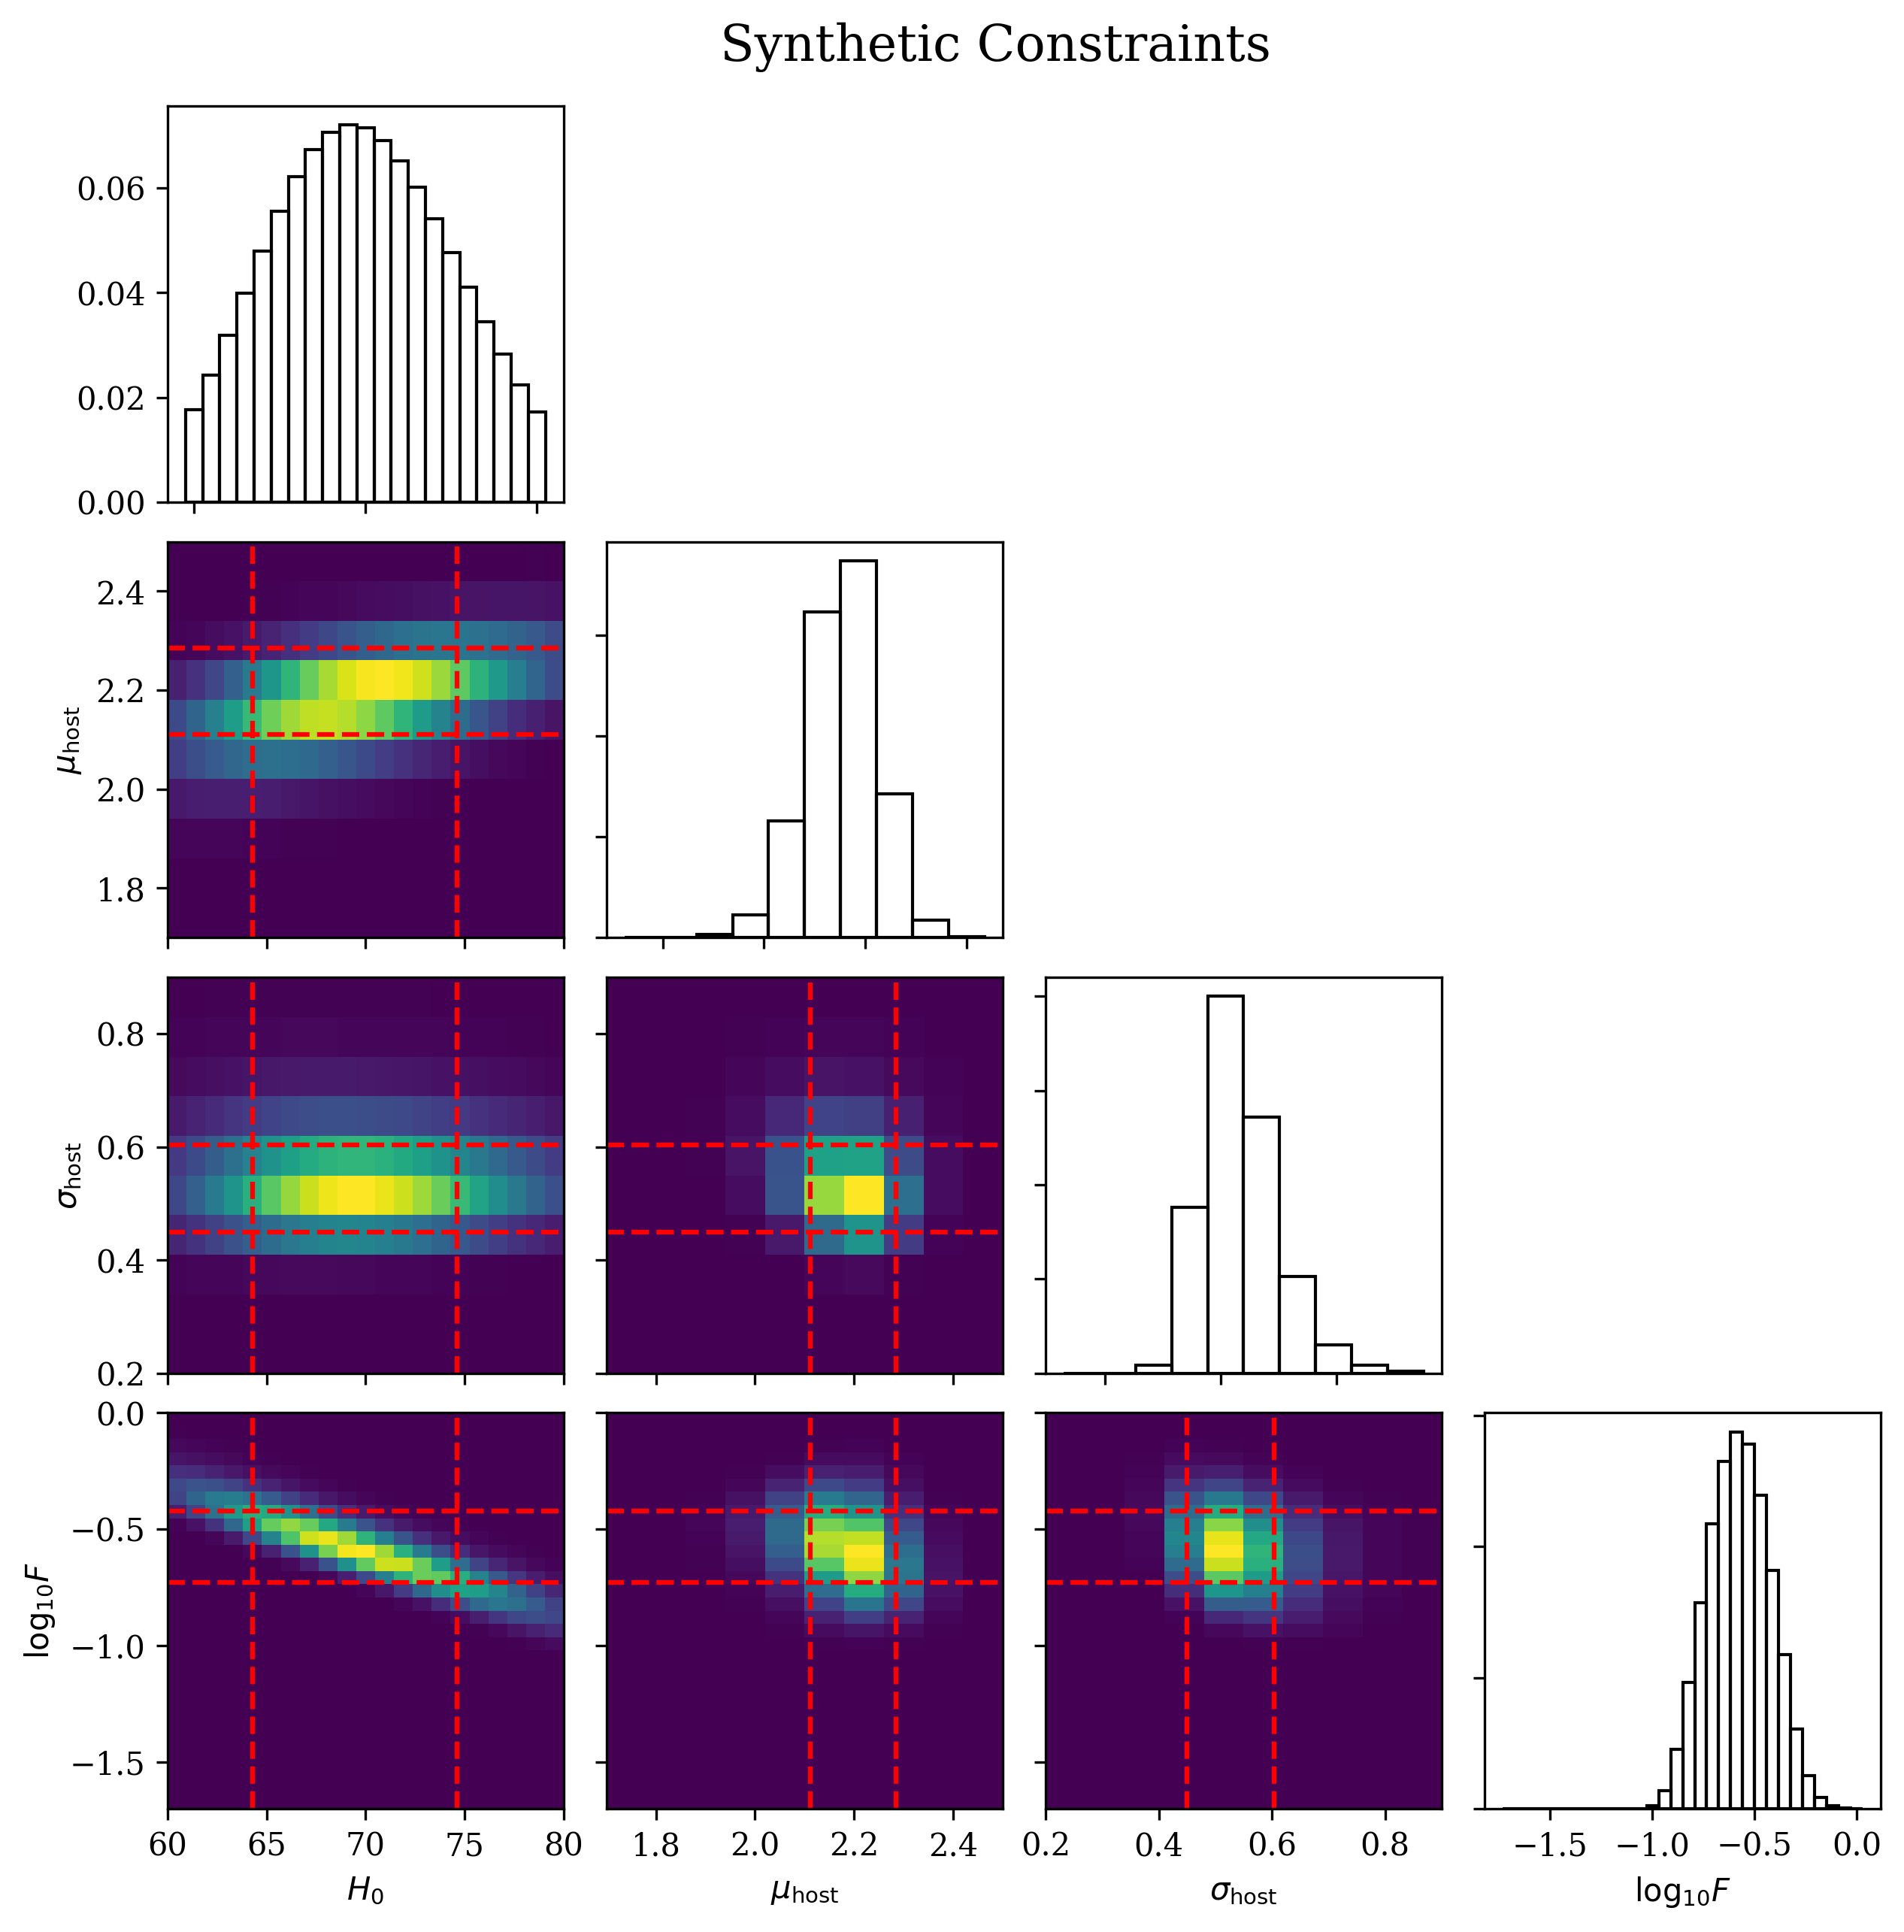

In [40]:
fig = plt.figure(figsize=(10,10), dpi=300)

nparams = len(data["params"])
params = data["params"]

params_tex = [
    r"$H_0$",
    r"$\mu_{\rm host}$",
    r"$\sigma_{\rm host}$",
    r"$\log_{10} F$",
]

# Diagonals
for k, param in enumerate(params):
    param_idx = np.where(data["params"] == param)[0][0]
    param_ax = fig.add_subplot(4, 4, (5*k)+1)
    dparam = data[param][1] - data[param][0]
    param_ax.bar(data[param], lls[param_idx], width=dparam, facecolor="None", edgecolor="black")
    param_ax.set_box_aspect(1)

    if k > 0:
        param_ax.set_yticklabels([])

    if k < nparams-1:
        param_ax.set_xticklabels([])

    if k == nparams-1:
        param_ax.set_xlabel(params_tex[-1])

# Off-diagonals
# H0 and lmean
ax_H0_lmean = fig.add_subplot(4, 4, 5)
ax_H0_lmean.imshow(arrays[0].T, origin="lower", aspect="auto", extent=[data["H0"][0], data["H0"][-1], data["lmean"][0], data["lmean"][-1]])
ax_H0_lmean.set_box_aspect(1)
ax_H0_lmean.set_ylabel(params_tex[1])
ax_H0_lmean.set_xticklabels([])
ax_H0_lmean.axvline(H0_lower, color="red", linestyle="--")
ax_H0_lmean.axvline(H0_upper, color="red", linestyle="--")
ax_H0_lmean.axhline(lmean_lower, color="red", linestyle="--")
ax_H0_lmean.axhline(lmean_upper, color="red", linestyle="--")

# H0 and lsigma
ax_H0_lsigma = fig.add_subplot(4, 4, 9)
ax_H0_lsigma.imshow(arrays[1].T, origin="lower", aspect="auto", extent=[data["H0"][0], data["H0"][-1], data["lsigma"][0], data["lsigma"][-1]])
ax_H0_lsigma.set_box_aspect(1)
ax_H0_lsigma.set_ylabel(params_tex[2])
ax_H0_lsigma.set_xticklabels([])
ax_H0_lsigma.axvline(H0_lower, color="red", linestyle="--")
ax_H0_lsigma.axvline(H0_upper, color="red", linestyle="--")
ax_H0_lsigma.axhline(lsigma_lower, color="red", linestyle="--")
ax_H0_lsigma.axhline(lsigma_upper, color="red", linestyle="--")

# H0 and logF
ax_H0_logF = fig.add_subplot(4, 4, 13)
ax_H0_logF.imshow(arrays[2].T, origin="lower", aspect="auto", extent=[data["H0"][0], data["H0"][-1], data["logF"][0], data["logF"][-1]])
ax_H0_logF.set_box_aspect(1)
ax_H0_logF.set_xlabel(params_tex[0])
ax_H0_logF.set_ylabel(params_tex[3])
ax_H0_logF.axvline(H0_lower, color="red", linestyle="--")
ax_H0_logF.axvline(H0_upper, color="red", linestyle="--")
ax_H0_logF.axhline(F_lower, color="red", linestyle="--")
ax_H0_logF.axhline(F_upper, color="red", linestyle="--")

# lmean and lsigma
ax_lmean_lsigma = fig.add_subplot(4, 4, 10)
ax_lmean_lsigma.imshow(arrays[3].T, origin="lower", aspect="auto", extent=[data["lmean"][0], data["lmean"][-1], data["lsigma"][0], data["lsigma"][-1]])
ax_lmean_lsigma.set_box_aspect(1)
ax_lmean_lsigma.set_xticklabels([])
ax_lmean_lsigma.set_yticklabels([])
ax_lmean_lsigma.axvline(lmean_lower, color="red", linestyle="--")
ax_lmean_lsigma.axvline(lmean_upper, color="red", linestyle="--")
ax_lmean_lsigma.axhline(lsigma_lower, color="red", linestyle="--")
ax_lmean_lsigma.axhline(lsigma_upper, color="red", linestyle="--")

# lmean and logF
ax_lmean_logF = fig.add_subplot(4, 4, 14)
ax_lmean_logF.imshow(arrays[4].T, origin="lower", aspect="auto", extent=[data["lmean"][0], data["lmean"][-1], data["logF"][0], data["logF"][-1]])
ax_lmean_logF.set_box_aspect(1)
ax_lmean_logF.set_xlabel(params_tex[1])
ax_lmean_logF.set_yticklabels([])
ax_lmean_logF.axvline(lmean_lower, color="red", linestyle="--")
ax_lmean_logF.axvline(lmean_upper, color="red", linestyle="--")
ax_lmean_logF.axhline(F_lower, color="red", linestyle="--")
ax_lmean_logF.axhline(F_upper, color="red", linestyle="--")

# lsigma and logF
ax_lsigma_logF = fig.add_subplot(4, 4, 15)
ax_lsigma_logF.imshow(arrays[5].T, origin="lower", aspect="auto", extent=[data["lsigma"][0], data["lsigma"][-1], data["logF"][0], data["logF"][-1]])
ax_lsigma_logF.set_box_aspect(1)
ax_lsigma_logF.set_xlabel(params_tex[2])
ax_lsigma_logF.set_yticklabels([])
ax_lsigma_logF.axvline(lsigma_lower, color="red", linestyle="--")
ax_lsigma_logF.axvline(lsigma_upper, color="red", linestyle="--")
ax_lsigma_logF.axhline(F_lower, color="red", linestyle="--")
ax_lsigma_logF.axhline(F_upper, color="red", linestyle="--")

plt.subplots_adjust(hspace = 0.1, wspace = 0.02)
if real_data:
    fig.text(0.5, 0.9, "Observed Constraints", ha="center", size=16)
else:
    fig.text(0.5, 0.9, "Synthetic Constraints", ha="center", size=16)
plt.show()